In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/practice/(2).tsv
/kaggle/input/practice/practice3.csv
/kaggle/input/practice/reason_not_exercise.xls
/kaggle/input/practice/practice.csv

In [78]:
practice0 = pd.DataFrame({"이름": ["홍길동","김길동"], "나이":[100,200]})

In [79]:
practice0

,이름,나이
0,홍길동,100
1,김길동,200


In [80]:
practice = pd.DataFrame({"날짜":[], "운동":[], "양":[]})
practice

,날짜,운동,양


In [81]:
practice.loc[0]=['19-3-1', '달리기', 1.0]
# # .loc[index] : 행 인덱스에 한 행을 추가해라 

In [82]:
practice.loc[1]=['19-3-2', '걷기', 1.0]
practice.loc[2]=['19-3-2', '달리기', 1.0]
practice.loc[3]=['19-3-2', '계단오르기', 1.0]
practice.loc[4]=['19-3-3', '걷기', 1.5]
practice.loc[5]=['19-3-3', '달리기', 1.0]

In [83]:
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0


In [84]:
practice.to_csv('../data/practice2.csv',encoding='utf-8')
#csv로 옮기기 > kaggle에서는 write가 안됨

In [85]:
practice2 = pd.read_csv('../data/practice2.csv', index_col=0)
practice2

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0


In [86]:
practice2.pivot_table(index='운동')

,양
운동,
걷기,1.25
계단오르기,1.00
달리기,1.00


In [87]:
practice2.loc[6]=['19-3-4', '걷기', 1.5]
practice2.loc[7]=['19-3-5', '달리기', 1.]
practice2.loc[8]=['19-3-6', '걷기', 2.5]
practice2.loc[9]=['19-3-6', '달리기', 0.5]

In [88]:
practice2.pivot_table(index='운동')
#아무것도 안 써준 피벗테이블 = avg(평균 average), 전체 데이터프레임을 요약.

,양
운동,
걷기,1.625
계단오르기,1.000
달리기,0.900


In [89]:
practice2.pivot_table(index='운동', aggfunc=[np.sum, np.average, len])
#aggregation : 총체, 집합체. -> abbr. : agg
#sum함수를 지정해주면 된다. > numpy 사용

sum average len     
         양       양  날짜    양
운동                         
걷기     6.5   1.625   4  4.0
계단오르기  1.0   1.000   1  1.0
달리기    4.5   0.900   5  5.0

In [90]:
prac_pivot=practice2.pivot('날짜','운동', '양')
prac_pivot
#날짜: 인덱스 / 운동 : 열 종류/ 양: 테이블 내부의 값 

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,NaN,NaN,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,NaN,1.0
19-3-4,1.5,NaN,NaN
19-3-5,NaN,NaN,1.0
19-3-6,2.5,NaN,0.5


In [91]:
prac_pivot.fillna(0, inplace=True)
#NaN 결측치를 삭제or 적합한 수치로 변환 (평균 or 0 or 특정 기본값)
# 변경을 원본에 반영하기 위해 inplace=True 
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,0.0,0.0,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,0.0,1.0
19-3-4,1.5,0.0,0.0
19-3-5,0.0,0.0,1.0
19-3-6,2.5,0.0,0.5


In [92]:
type(prac_pivot)

pandas.core.frame.DataFrame

In [93]:
#!pip install xlrd
#interactive한 상황에서 linux 명령어 : !로.
#xlrd 설치

In [94]:
not_exercise=pd.read_excel('../data/reason_not_exercise.xls')
not_exercise

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,2017,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,2017,연령별,40대,57.7,6.8,5.2,29.4,1
7,2017,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,2017,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,2017,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [95]:
not_exercise.drop(columns='기간', inplace=True)
not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [96]:
not_exercise.drop(index=range(22, 53), inplace=True)
not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [97]:
not_exercise.shape

(22, 7)

In [98]:
not_exercise['대분류']

0       서울시
1        성별
2        성별
3       연령별
4       연령별
5       연령별
6       연령별
7       연령별
8       연령별
9       학력별
10      학력별
11      학력별
12      학력별
13      소득별
14      소득별
15      소득별
16      소득별
17      소득별
18      소득별
19    혼인상태별
20    혼인상태별
21    혼인상태별
Name: 대분류, dtype: object

In [99]:
not_exercise['대분류'] == '성별' #전체 목록에 수행된 명령: broadcasting 브로드캐스팅

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: 대분류, dtype: bool

In [100]:
not_exercise[not_exercise['대분류'] == '성별'] #대괄호 내에 조건을 넣어 추출

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


In [101]:
not_ex_sex = not_exercise[not_exercise['대분류'] == '성별'].copy()  #깊은 복사
not_ex_sex

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


In [102]:
not_ex_sex.drop(columns='대분류', inplace=True)

In [103]:
not_ex_sex.set_index('분류', inplace=True)

In [104]:
not_ex_sex

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
남자,55.2,7.9,5.5,29.8,1.6
여자,45.0,8.3,6.0,38.8,1.8


In [105]:
import matplotlib.pyplot as plt #시각화 모듈 matplotlib 임포트

In [106]:
from matplotlib import font_manager, rc  #한글 사용시 폰트 설정

In [107]:
f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=f_path).get_name()
rc('font', family= font_name)

In [108]:
plt.rcParams['axes.unicode_minus']=False

In [109]:
def call():
    return 100, 200 #파이썬은 return을 여러개 보냄
print (call())

(100, 200)


In [110]:
x, y = call()
print(x,y)

100 200


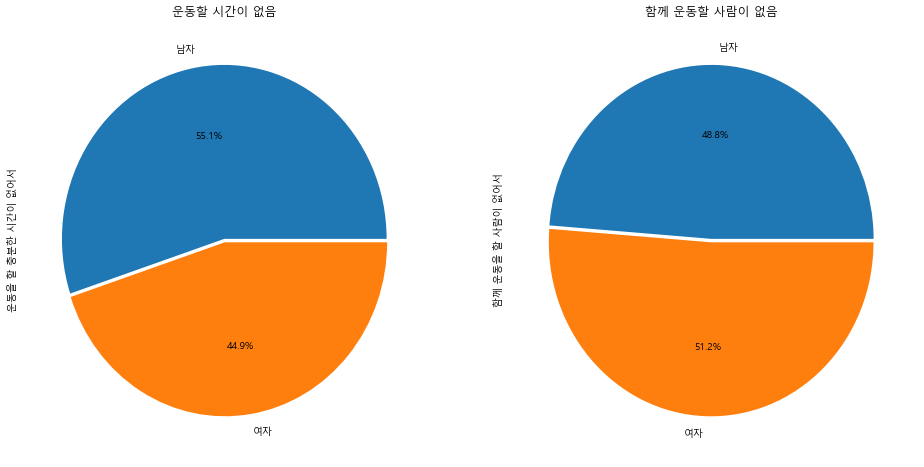

In [135]:
f, ax = plt.subplots(1,2, figsize = (16,8))
not_ex_sex['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('운동할 시간이 없음')
not_ex_sex['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('함께 운동할 사람이 없음')

plt.show()

In [141]:
not_ex_age = not_exercise[not_exercise['대분류'] == '연령별'].copy()
not_ex_age

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6


In [142]:
not_ex_age.drop(columns='대분류', inplace=True)

In [143]:
not_ex_age.set_index('분류', inplace=True)

In [144]:
not_ex_age

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
10대,55.7,6.1,5.6,32.2,0.3
20대,54.8,6.9,5.2,32.9,0.1
30대,58.1,5.5,4.6,31.6,0.2
40대,57.7,6.8,5.2,29.4,1
50대,50.1,9.2,7.2,32.2,1.4
60대 이상,27.5,12.8,6.9,46.8,6


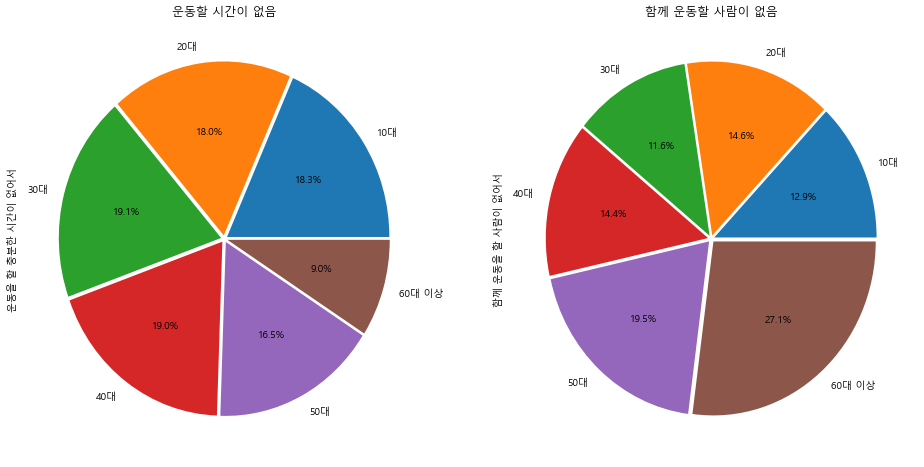

In [147]:
f, ax = plt.subplots(1,2, figsize = (16,8))
not_ex_age['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02], ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('운동할 시간이 없음')
not_ex_age['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02], ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('함께 운동할 사람이 없음')

plt.show()

In [148]:
not_ex_wage = not_exercise[not_exercise['대분류'] == '소득별'].copy()
not_ex_wage

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
13,소득별,100만원 미만,22.7,10.3,3.6,50.7,12.7
14,소득별,100-200만원 미만,34.3,11.5,7.1,41.5,5.6
15,소득별,200-300만원 미만,48.8,12.3,6.8,30.7,1.4
16,소득별,300-400만원 미만,54.9,7.1,6.5,31.2,0.3
17,소득별,400-500만원 미만,56.1,5,5.3,33.0,0.6
18,소득별,500만원 이상,52.3,7.1,5.1,34.9,0.6


In [149]:
not_ex_wage.drop(columns="대분류", inplace=True)

In [150]:
not_ex_wage.set_index('분류', inplace=True)
not_ex_wage

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
100만원 미만,22.7,10.3,3.6,50.7,12.7
100-200만원 미만,34.3,11.5,7.1,41.5,5.6
200-300만원 미만,48.8,12.3,6.8,30.7,1.4
300-400만원 미만,54.9,7.1,6.5,31.2,0.3
400-500만원 미만,56.1,5,5.3,33.0,0.6
500만원 이상,52.3,7.1,5.1,34.9,0.6


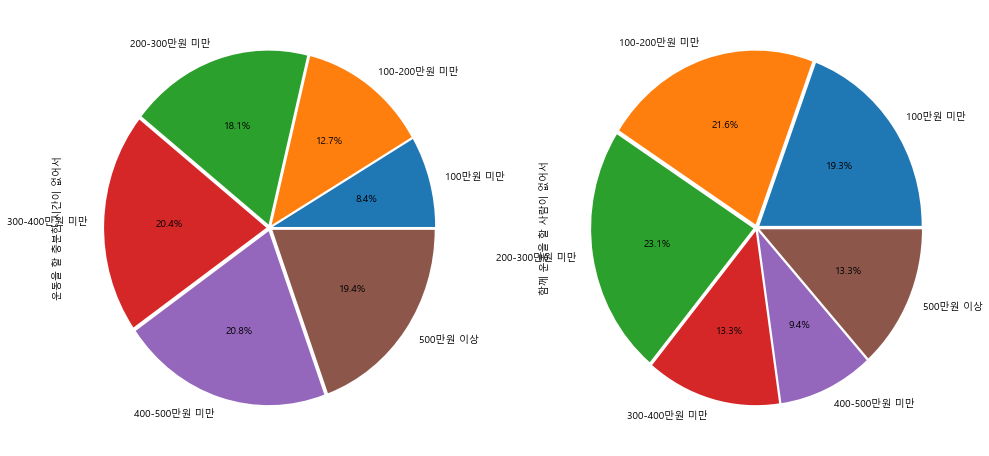

In [152]:
f, ax = plt.subplots(1,2, figsize = (16,8))
not_ex_wage['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02], ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('운동할 시간이 없음')
not_ex_wage['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02], ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('함께 운동할 사람이 없음')

plt.show()